
# Summary: usecase sales dashboard with Jupyter Dash


<p>
<b>Notice:</b><br>
A live version is deposited on Binder.<br>
"Binder allows you to create custom computing environments that can be shared and used by many remote users."<br>
This allows to see the Dash apps create in the notebooks locally in your browser.<br>
Jumpt directly to Binder for running the code of the repository:
<a href="https://mybinder.org/v2/gh/RolfChung/usecase_sales_dashboard_plotly_dash/HEAD" target="_blank">usecase_sales_dashboard</a> 
</p>

<p>
Dash made a great job bringing Dash to Jupyter.<br>
Normally you would develop and start Dash from an IDE and the command line.<br>
As this project is a demonstration of Dash capabilities JupyterDash was chosen.<br>
The JupyterDash has different modes of presentation: inline, jupyter lab, external.<br>
The repository here uses inline and external.<br>
In external mode a link is created at the end of the notebook. This outputsthe Dash app into a website.<br>
However Github does not allow to start Dash apps from notebooks right now.<br>
That is a reason a Binder version of this repository was created.<br>
One last word: <b>Dash needs Javascript to be installed on the machine to work.</b>
</p>

<p>
This is a use case for Plotly Dash.<br>
It creates a sales dashboard for world wide e-commerce data.<br>
According to Wordnik a dashboard is <br>
"a user interface on a computer display that presents constantly updated information, such as processing speed, in a format that resembles the dashboard of a vehicle."<br>
This sales dashboard is intuitively understandable.    
<p>


<p>
On a technical level this project applies Plotly and JupyterDash for data visualization and web deployment.<br>
It is also applying HTML and CSS to structure and style the dashboard.
</p>

<p>
This notebook is part of larger project consisting of a portfolio of notebooks testing out different versions of the sales dashboard.<br>
There is also a dedicated notebook for importing and cleaning the data.<br>
The cleaned data can immediately used in the JupyterDash notebooks.<br>
It is followed up by another project adding interactivity to the sales dashboard.<br>
Then users can get particular information by sliding or klicking on graphic elements.<br>
</p>


In [1]:
# Base packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import os
import warnings

import ipywidgets


from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

# plotly.offline.init_notebook_mode(connected=True)

# plotly
import plotly
import plotly.express as px
# plotly.tools.set_credentials_file(username = 'lathkar', api_key = '************')


# Set notebook mode to work in offline
#pyo.init_notebook_mode()

import plotly.io as pio

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set notebook mode to work in offline
import plotly.offline as pyo
#pyo.init_notebook_mode()

#import plotly.io as pio
# print(pio.renderers)

pio.renderers.default = 'jupyterlab'


plotly.offline.init_notebook_mode(connected=True)

# print(os.getcwd())

import dash
import dash_core_components as dcc
import dash_html_components as html


from dash.dependencies import Input, Output


# from dash import dcc
# import dash_core_components as dcc - depreciated
# from dash import html
# import dash_html_components as html - depreciated

from jupyter_dash import JupyterDash

# %%cmd
# cd

cwd=os.getcwd()
# print(cwd)

revenue_topten = \
pd.read_csv("csv/cleaned_df/revenue_topten.csv")

total_sales_gb_month =\
pd.read_csv("csv/cleaned_df/total_sales_gb_month.csv")


categories = pd.read_csv("csv/cleaned_df/categories.csv", index_col=0)


top_minor_category,  top_minor_category_orders = \
categories.iloc[0, 1:3].tolist()

second_minor_category,  second_minor_category_orders = \
categories.iloc[1, 1:3].tolist()


# print(second_minor_category)
# print(second_minor_category_orders)

major_categories_log = pd.read_csv("csv/cleaned_df/major_category_log.csv", index_col=0)


# Single plots
<p>
for prebuilding the Plotly graphs later used the dashboard Jupyter Dash app.<br>
(Jupyter) Dash works hand in hand with Plotly.<br>
Plotly plots are used and integrated into the Dash web app.
</p>

### Total sales by month

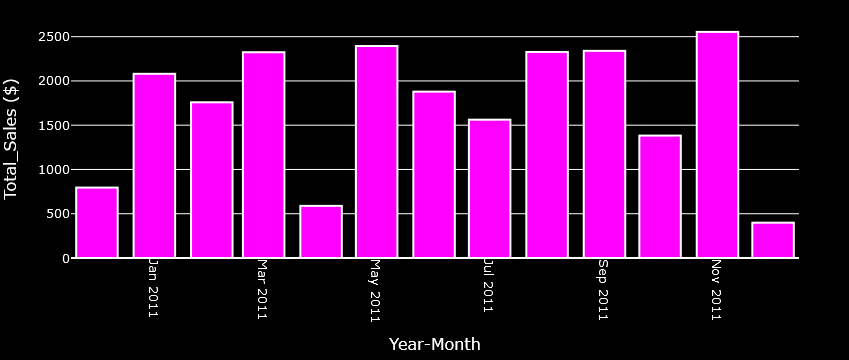

In [2]:
fig_sales_gb_month = \
px.bar(data_frame=total_sales_gb_month, x='Year-Month', y='Total_Sales ($)',
       color_discrete_sequence=["magenta"])

fig_sales_gb_month.update_traces(marker_line_width=2, marker_line_color='black')
fig_sales_gb_month.update_layout({'plot_bgcolor':'black', 'paper_bgcolor':'black',
                                  'font':{'color':'white', 'size':13},
                                  'margin':{'l':50, 'r':50, 'b':10, 't':20}})

fig_sales_gb_month.update_traces(marker_line_width=2,marker_line_color="white")
fig_sales_gb_month.update_xaxes(tickangle=90)

# Setting the margins and thereby cutting the paper bg, 
# makes it easier to set the margins within the Dash app below

#fig_sales_gb_month.show()

### Total sales by country

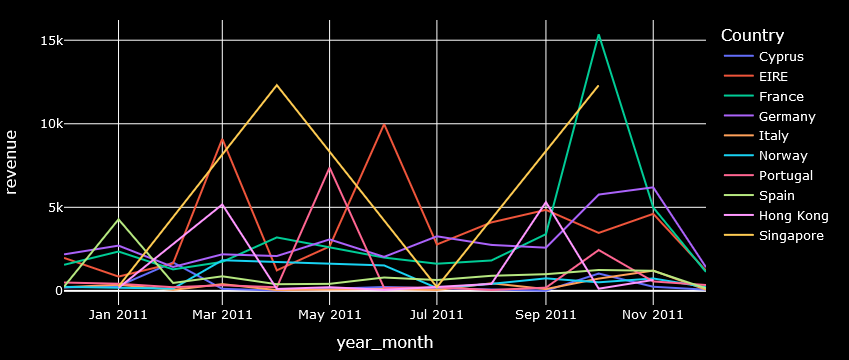

In [3]:
top_ten_revenue_fig = \
px.line(data_frame=revenue_topten, x='year_month', y='revenue', color='Country')

top_ten_revenue_fig.update_layout({"paper_bgcolor":"black", "plot_bgcolor":'black',
                                   "font":{'color':'white', 'size':13},
                                   'margin':{'l':50, 'r':50, 'b':20, 't':20}})

       
# top_ten_revenue_fig.show()

### Total order by minor categories

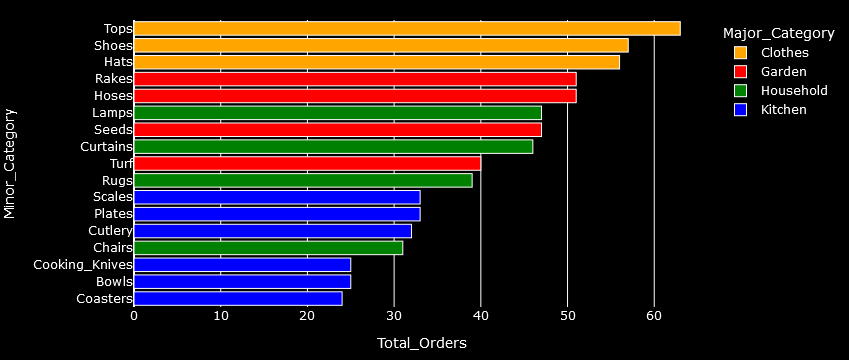

In [4]:
categories_fig = \
px.bar(categories, x='Total_Orders', y='Minor_Category', color='Major_Category',
      color_discrete_sequence=["orange", "red", "green", "blue"])

categories_fig.update_layout({'yaxis':{'dtick':1, 'categoryorder':'total ascending'},
                              'plot_bgcolor':'black', 'paper_bgcolor':'black',
                              'font':{'color':'white', 'size':12},
                               'margin':{'l':50, 'r':50, 'b':20, 't':20}}) 

categories_fig.update_traces(marker_line_width=1, marker_line_color="white")

categories_fig.show()

### Total order sum by major categories

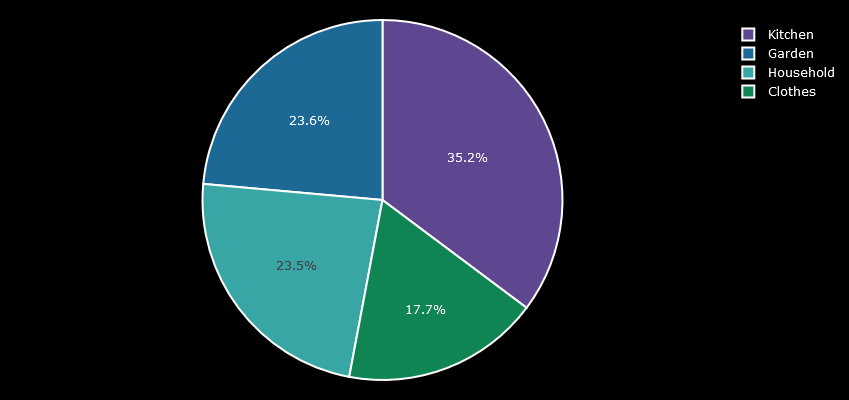

In [5]:
major_categories_fig = \
px.pie(major_categories_log, names='Major_Category', values='Total_Orders',
      color_discrete_sequence=px.colors.qualitative.Prism,
      width=600, height=400)

major_categories_fig.update_layout({'plot_bgcolor':'black', 'paper_bgcolor':'black',
                                    'font':{'size':12, 'color':'white'},
                                    'margin':{'l':50, 'r':50, 'b':20, 't':20}})

major_categories_fig.update_traces(marker_line_color='white', marker_line_width=2)

major_categories_fig.show()

<hr width=”300″, size=5> 

## Sales dashboard: total sales & total orders

<p>
by country, month, categories with Jupyter Dash.
</p>

In [6]:
logo_path=\
'https://banner2.kisspng.com/20180330/ezq/kisspng-ferry-cruise-ship-desktop-wallpaper-clip-art-cruise-5abe534ac59e18.4151639915224226028095.jpg'

revenue_topten_countries_list =\
revenue_topten.sort_values(by='revenue', ascending = False)['Country'].unique().tolist()

# revenue_topten_countries_list 

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

app_quick_dashboard = JupyterDash(__name__)

# Create server variable with Flask server object for use with gunicorn
server = app_quick_dashboard.server

app_quick_dashboard.layout = \
html.Div([
 
# Images in a local folder are not displayed easily
html.Img(src=logo_path,
         height=50, width=70),
html.H1('Total Sales Numbers'),
html.H2('Top ten countries by revenue without UK'),
html.Div(dcc.Graph(id='top_ten_revenue', figure = top_ten_revenue_fig,
         style={'width':'900px', 'height':'400px', 'margin':'auto','paper_bgcolor':'gainsboro'})),

html.H2('Sales by month'),
html.Div(dcc.Graph(id='fig_sales_gb_month', figure = fig_sales_gb_month),
         style={'text-align':'center', 'font-size':15}),

html.Span(children=[
html.B("Top five revenue countries without UK:"),
html.Br(),
html.B("France, Singapore, EIRE, Portugal, Germany"),
html.Br(),
html.I("Strongest revenue occurs in UK.")],
style={'font-size':14, 'font-type':'Arial', 'text-align':'left', 
       'color':'crimson'}),
    

html.H1('Top minor sales categories'),
html.Div(dcc.Graph(figure=categories_fig, 
                   # css-styling
                   style={'width':'700px', 'height':'700', 'margin-bottom':30})),
html.Span(children=[html.Div('Note:'),
                    html.Br(id="break_tag", style={'margin-bottom':"0.5px"}),
                    html.H1('The top two order categories are:',
                            style={'text-align':'center', 'font-size':17, 'color':'crimson'}),
                    html.Ol(children=[html.Li(children=[top_minor_category, ": ", 
                                                        top_minor_category_orders, " items"]), 
                                      html.Li(children=[second_minor_category, ": ",
                                                        second_minor_category_orders, " items"])
                                     ])
                   ], 
                   style={'text-align':'center', 'font-size':15, 'color':'crimson'}),
    
    
# plot: major_categories_fig
html.Span(children=[
html.H2('Top major sales categories'),
html.Div(dcc.Graph(figure=major_categories_fig,
                   style={'width':'700px', 'height':'200', 
                          'margin-bottom':10})),
    
html.Div(children=
         [html.Div('Note'), 
          html.Div('The scale of major categories is using the natural logarithm.'),
          html.Div('Otherwise the differences between the categories would not be visible.')],
          style={'text-align':'center', 'font-size':18, 'color':'crimson'})  
])
,
    
html.Br(),
html.I('Powered by Jupyter Dash')
              
], style = {'text-align':'center',
            'font-size':20,
            'color':'white',
            'paper_bgcolor':'black', 
            'background-color':'black',
            'border':'4px solid red',
            'padding':'2px'})

# if __name__ == '__main__':
    # app_quick_dashboard.run_server(debug=True)
    
app_quick_dashboard.run_server(mode='inline', debug =True, port=8050)